# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

## 1

### Importing the modules

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

## 2 

### 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [ ]:
corona_dataset_csv = pd.read_csv('Covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)
#We will notice data is from 22 January 2020 to 30 April 2020

#### Let's check the shape of the dataframe

In [ ]:
corona_dataset_csv.shape    #Tuple with 266 rows and 104 columns

In [ ]:
columns = corona_dataset_csv.columns
columns

### 2.2: Deleting the useless columns

In [ ]:
#Latitude and Longitude are not important features for us here
corona_dataset_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [ ]:
corona_dataset_csv.head(10)

### 2.3: Arranging the countries Alphabetically

In [ ]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [ ]:
corona_dataset_aggregated.head(10)
#After aggregation, the index of the df is the column at which we aggregated

In [ ]:
corona_dataset_aggregated.shape
#we have 187 countries, 102 dates

### 2.4: Visualizing data related to a country for example India
visualization always helps for better understanding of our data.

In [ ]:
corona_dataset_aggregated.loc["India"]
#will return pandas series?

### 3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

In [ ]:
corona_dataset_aggregated.loc['India'].plot()
#will plot the values on different date

In [ ]:
corona_dataset_aggregated.loc['Japan'].plot()
plt.legend()

In [ ]:
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Brazil'].plot()
corona_dataset_aggregated.loc['Japan'].plot()
plt.legend()

In [ ]:
# Data for India starting from 3/21/20
india_data = corona_dataset_aggregated.loc['India']

# Filter data starting after 3/21/20
india_after_date = india_data.loc['3/22/20':]

# Select the first three dates
india_first_three_after_date = india_after_date.iloc[:3]

# Print the selected dates and case counts
print("India data for the first three dates after 3/21/20:\n", india_first_three_after_date)

# Plotting the data
plt.figure(figsize=(8, 5))
india_first_three_after_date.plot(marker='o', color='blue', linestyle='-', label="India")
plt.title("Spread of COVID-19 in India (First 3 Dates After 3/21/20)", fontsize=14)
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Spread of the virus in India for the first 3 dates
india_first_three_days = corona_dataset_aggregated.loc['India'][:3]
print("India data for the first three dates:\n", india_first_three_days)

# Calculate daily changes in cases
india_daily_changes = india_first_three_days.diff()
print("\nDaily changes in cases for India:\n", india_daily_changes)

# Generate the interpretation using iloc for positional indexing
for i in range(1, len(india_first_three_days)):
    increase = india_first_three_days.iloc[i] - india_first_three_days.iloc[i - 1]
    print(f"In the {i}th 24 hrs, an increase ({india_first_three_days.iloc[i - 1]} to {india_first_three_days.iloc[i]}) by {increase}")

# Average and maximum new cases
average_new_cases = india_daily_changes.mean()
maximum_new_cases = india_daily_changes.max()
print(f"\nAverage number of new cases: {average_new_cases}")
print(f"Maximum number of new cases: {maximum_new_cases}")

### 3.1: caculating the first derivative of the curve

In [ ]:
corona_dataset_aggregated.loc["India"].diff().plot()

In [ ]:
india_data = corona_dataset_aggregated.loc['India']
daily_change = india_data.diff()
rate_of_change = (daily_change / india_data.shift(1)) * 100

rate_of_change.plot()
plt.title("Rate of Change of COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Rate of Change (%)")
plt.grid(True)
plt.show()


This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

### 3.2: find maxmimum infection rate for India

In [ ]:
corona_dataset_aggregated.loc["India"].diff().max()
#In only 24 hrs, the difference was 1893

In [ ]:
corona_dataset_aggregated.loc["Brazil"].diff().max()
#In only 24 hrs, the difference was 7502

In [ ]:
corona_dataset_aggregated.loc["Japan"].diff().max()
#In only 24 hrs, the difference was 1161

### 3.3: find maximum infection rate for all of the countries. 

In [ ]:
# Ensure all data in corona_dataset_aggregated is numeric
corona_dataset_aggregated = corona_dataset_aggregated.apply(pd.to_numeric, errors='coerce')

# Calculate maximum infection rates
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for i in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[i].diff().max())

print("Max infection rates for all countries:\n", max_infection_rates)


In [ ]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [ ]:
corona_dataset_aggregated.head(80)

### Task 3.4: create a new dataframe with only needed column 

In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [ ]:
corona_data.head()

### 4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### 4.1 : importing the dataset

In [ ]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [ ]:
happiness_report_csv.head()

### 4.2: let's drop the useless columns 

In [ ]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [ ]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

### 4.3: changing the indices of the dataframe

In [ ]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [ ]:
happiness_report_csv.head()

### 4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [ ]:
corona_data.head()

In [ ]:
corona_data.shape    #Tuple with 187 countries

#### wolrd happiness report Dataset :

In [ ]:
happiness_report_csv.head()

In [ ]:
happiness_report_csv.shape    #156 countries, less than corona data

In [ ]:
#Inner join
data = corona_data.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
data.head()

### 4.5: correlation matrix 

In [ ]:
data.corr()

There is +ve correlation between max_infection-rate and all other features

### 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [ ]:
data.head()

### 5.1: Plotting GDP vs maximum Infection rate

In [ ]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.scatterplot(x=x, y=y)


In [ ]:
#RegPlot
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

#Line fitted, +ve slope seen

### 5.2: Plotting Social support vs maximum Infection rate

In [ ]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

In [ ]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

### 5.3: Plotting Healthy life expectancy vs maximum Infection rate

In [ ]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

In [ ]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

### 5.4: Plotting Freedom to make life choices vs maximum Infection rate

In [ ]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

In [ ]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))

In [ ]:
# Data for India and China
india_china_data = corona_dataset_aggregated.loc[['India', 'China']]

# Plot the trend of infections for India and China
india_china_data.T.plot(figsize=(10, 6), marker='o')
plt.title("Spread of COVID-19 in India and China")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend(["India", "China"])
plt.grid(True)
plt.show()


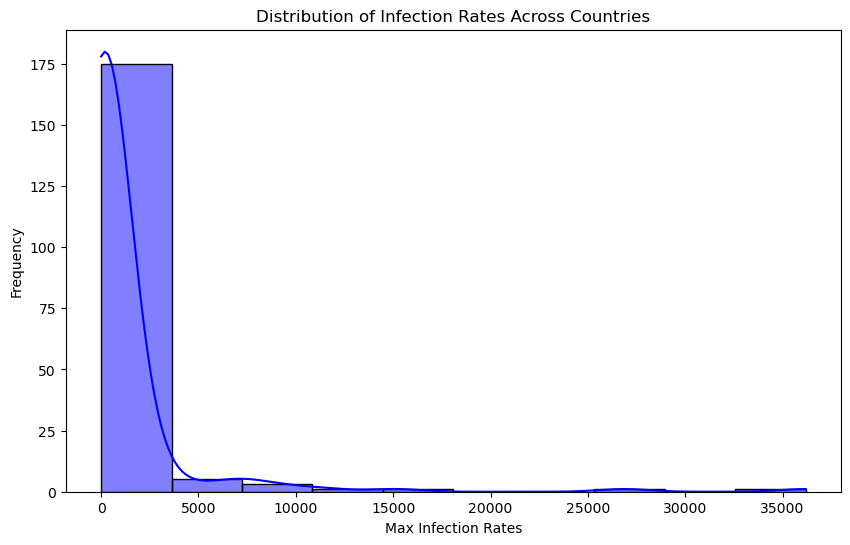

In [381]:
plt.figure(figsize=(10, 6))
sns.histplot(corona_dataset_aggregated["max_infection_rates"], bins=10, kde=True, color='blue')
plt.title("Distribution of Infection Rates Across Countries")
plt.xlabel("Max Infection Rates")
plt.ylabel("Frequency")
plt.show()
